<a href="https://colab.research.google.com/github/vitorbeltrao/MilitaryExpenditure/blob/main/Military_Spending_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Military Spending Analysis

A quick and insightful analysis of countries military spending.

<center><img src="https://images.unsplash.com/photo-1580922110301-a666f6745565?ixlib=rb-1.2.1&ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&auto=format&fit=crop&w=1470&q=80" height="300"></center>

Wars are part of human history, being recorded and studied since antiquity. 

Wars are armed conflicts that happen for different reasons, such as religious disagreements, political and economic interests, territorial disputes, ethnic rivalries, among other reasons.

Unfortunately, the world is living this terrible part of history again with the current conflict between Russia and Ukraine and that was the motivation of this work: **Analyze country military/defense spending.**

Through the data, we will try to find out how countries are acting according to their military expenditures and compare them, in order to obtain information and insights on this topic that has come up again this year. Let's go!



## Data Collection

Data were collected from the following sources: [ourworldindata](https://ourworldindata.org/) and [worldbank](https://data.worldbank.org/).

**Ourworldindata databases contain information on countries military expenditures, until 2020.**

**The worldbank databases contain information on the populations and GDP of countries, until 2020.**

To proceed with this analysis, we are going to do some data engineering, which we will not detail here in this article. Feel free to head over to my [github](https://github.com/vitorbeltrao) and see how this engineering was done in full!

In [ ]:
# Upgrade necessary packages
!pip install --upgrade xlrd

In [ ]:
# Import the necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore')

In [ ]:
# Transform csv file into a pandas dataframe - Our world in data
df_expedinture_total = pd.read_csv("https://raw.githubusercontent.com/vitorbeltrao/MilitaryExpenditure/main/data/military-expenditure-total.csv")

# Transform excel files into a pandas dataframe - World bank
df_country_gdp = pd.read_excel("https://github.com/vitorbeltrao/MilitaryExpenditure/blob/main/data/API_NY.GDP.MKTP.CD_DS2_en_excel_v2_3158925.xls?raw=true")
df_country_population = pd.read_excel("https://github.com/vitorbeltrao/MilitaryExpenditure/blob/main/data/API_SP.POP.TOTL_DS2_en_excel_v2_3158861.xls?raw=true")

In [ ]:
# # Entries of total expenditure dataset
# df_expedinture_total.head()

In [ ]:
# # Entries of countries gdp
# df_country_gdp.head()

In [ ]:
# # Entries of countries population
# df_country_population.head()

## Data Engineer

Before actually starting our analysis, let's concatenate [ourworldindata](https://ourworldindata.org/) dataset which contains the information of total expenditures for each country, with [worldbank](https://data.worldbank.org/) datasets which contains the information on the populations and GDP of the countries.

In [ ]:
# Eliminate unwanted columns from the population dataset
df_country_population = df_country_population.drop(['Country Code', 'Indicator Name', 'Indicator Code'], axis=1)

# Rename column "Country_Name" to "Entity" of population dataset
df_country_population.rename(columns={'Country Name': 'Entity'}, inplace = True)

# # Check the first 05 entries of the population dataset
# df_country_population.head()

In [ ]:
# Eliminate unwanted columns from the GDP dataset
df_country_gdp = df_country_gdp.drop(['Country Code', 'Indicator Name', 'Indicator Code'], axis=1)

# Rename column "Country_Name" to "Entity" of GDP dataset
df_country_gdp.rename(columns={'Country Name': 'Entity'}, inplace = True)

# # Check the first 05 entries of the GDP dataset
# df_country_gdp.head()

In [ ]:
# Pivot the dataframe over the population
df_pivot_pop = pd.melt(df_country_population, id_vars = ['Entity'], var_name = 'Year',
                       value_name = 'Population', ignore_index = False)

# Transforming 'Year' column to int over population
df_pivot_pop["Year"] = pd.to_numeric(df_pivot_pop["Year"])

# # Check the first 05 entries of the population dataset
# df_pivot_pop.head()

In [ ]:
# Pivot the dataframe over GDP
df_pivot_pib = pd.melt(df_country_gdp, id_vars = ['Entity'], var_name = 'Year',
                       value_name = 'GDP', ignore_index = False)

# Transforming 'Year' column to int over GDP
df_pivot_pib["Year"] = pd.to_numeric(df_pivot_pib["Year"])

# # Check the first 05 entries of the GDP dataset
# df_pivot_pib.head()

In [ ]:
# Merge the dataframes on military expenditures, population and GDP
df_final = pd.merge(df_expedinture_total, df_pivot_pop, how = 'left', on = ['Entity', 'Year'])
df_final = pd.merge(df_final, df_pivot_pib, how = 'left', on = ['Entity', 'Year'])

# Our final dataframe to answer the questions
df_final.head()

,Entity,Code,Year,military_expenditure,Population,GDP
0,Afghanistan,AFG,1970,5373185,11173654.0,1.748887e+09
1,Afghanistan,AFG,1973,6230685,12108963.0,1.733333e+09
2,Afghanistan,AFG,1974,6056124,12412960.0,2.155555e+09
3,Afghanistan,AFG,1975,6357396,12689164.0,2.366667e+09
4,Afghanistan,AFG,1976,8108200,12943093.0,2.555556e+09


This is the result of our data engineering that we did by joining all the datasets.

## Exploratory Data Analysis

Let's use this dataset above to answer some pertinent and interesting questions!

### 1. How much does a country's military expenditure corresponds of the respective GDP?

The idea here is to have a percentage notion of how much countries spend on militarism and how much this corresponds to total GDP.

In [ ]:
# Create copy of dataframe
df_eda = df_final.copy()

# Create a new column dividing military expenditure by GDP
df_eda['percentage_military_expenditure'] = (df_eda.military_expenditure / df_eda.GDP) * 100
df_eda.head()

,Entity,Code,Year,military_expenditure,Population,GDP,percentage_military_expenditure
0,Afghanistan,AFG,1970,5373185,11173654.0,1.748887e+09,0.307235
1,Afghanistan,AFG,1973,6230685,12108963.0,1.733333e+09,0.359463
2,Afghanistan,AFG,1974,6056124,12412960.0,2.155555e+09,0.280954
3,Afghanistan,AFG,1975,6357396,12689164.0,2.366667e+09,0.268622
4,Afghanistan,AFG,1976,8108200,12943093.0,2.555556e+09,0.317277


Let's see graphically, this data filtered by the last year.

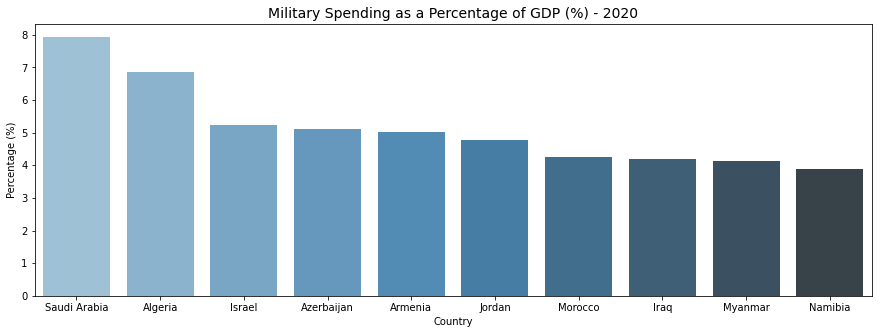

In [ ]:
# Let's filter the data by the last year
df_filtered = df_eda.loc[(df_eda['Year'] == 2020)].sort_values(by=['percentage_military_expenditure'], ascending=False).head(10)

# Delete null data from the column that we are analysing
df_filtered.dropna(subset=['percentage_military_expenditure'], inplace = True)

# Create a function of the graph to reuse later
def barplot(figsize, title, data, x, y, xlabel, ylabel):
  # Plot the graph
  plt.figure(figsize=figsize)

  # Title
  plt.title(title, fontsize = 14)

  # Graph
  sns.barplot(data = data, x = x, y = y, 
              ci = None, palette = "Blues_d")

  # Label
  plt.xlabel(xlabel)
  plt.ylabel(ylabel)
  plt.show()

barplot((15, 5), 'Military Spending as a Percentage of GDP (%) - 2020', df_filtered, 
        'Entity', 'percentage_military_expenditure', 
        'Country', 'Percentage (%)')

With a list made up only of Asian and African countries, these countries have the most military expenditures as a percentage of GDP.

These countries have relatively low GDP, so when extracting military expenditures as a percentage of GDP, their percentages are higher than countries that have infinitely higher military expenditures in absolute terms.

Anyway, it's always a surprise not to see any North American or European country on this list, do you agree?

### 2. What is the per capita military expenditure?

Let's analyze now, what is the military expenditure per capita and compare the ten countries with the highest expenditures as we did in the previous topic.

In [ ]:
# Create a new column dividing military expenditure by population
df_eda['military_expenditure_percapita'] = (df_eda.military_expenditure / df_eda.Population)
df_eda.head()

,Entity,Code,Year,military_expenditure,Population,GDP,percentage_military_expenditure,military_expenditure_percapita
0,Afghanistan,AFG,1970,5373185,11173654.0,1.748887e+09,0.307235,0.480880
1,Afghanistan,AFG,1973,6230685,12108963.0,1.733333e+09,0.359463,0.514551
2,Afghanistan,AFG,1974,6056124,12412960.0,2.155555e+09,0.280954,0.487887
3,Afghanistan,AFG,1975,6357396,12689164.0,2.366667e+09,0.268622,0.501010
4,Afghanistan,AFG,1976,8108200,12943093.0,2.555556e+09,0.317277,0.626450


Let's see graphically, this data filtered by the last year.

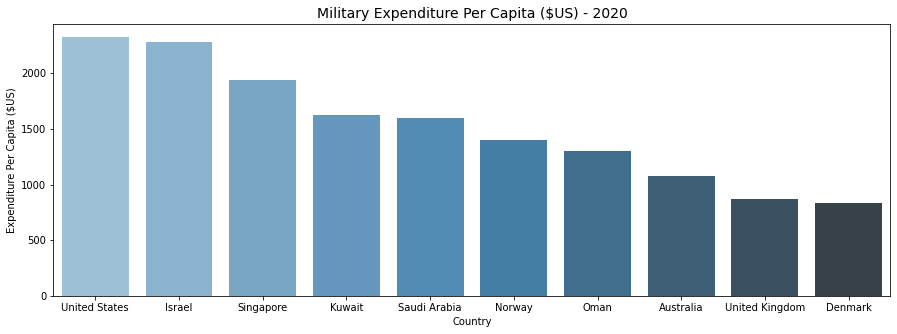

In [ ]:
# Let's filter the data by the last year
df_filtered2 = df_eda.loc[(df_eda['Year'] == 2020) &
                          (df_eda['Entity'] != 'North America')].sort_values(by=['military_expenditure_percapita'], ascending=False).head(10)

# Delete null data from the column that we are analysing
df_filtered2.dropna(subset=['military_expenditure_percapita'], inplace = True)

# Call the graph function that we created in the previously topic
barplot((15, 5), 'Military Expenditure Per Capita ($US) - 2020', df_filtered2, 
        'Entity', 'military_expenditure_percapita', 
        'Country', 'Expenditure Per Capita ($US)')

Now this list is more diverse and with some major world powers, North American, European and Asian.

See how countries like Israel and the United States spend almost twice as much per capita compared to the last countries on this list. Can you imagine for the countries that are not even on this list?

### 3. What were the top ten countries with the highest war expenditures in the last year?

Now let's analyze something more simple, but interesting, which is the absolute expenditure of countries.

Let's follow the same line of reasoning as in the previous topics to be able to compare.

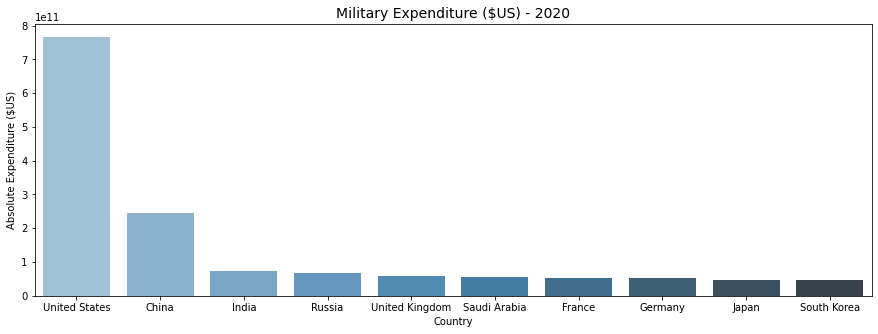

In [ ]:
# Let's filter the data by the last year
df_filtered3 = df_eda.loc[(df_eda['Year'] == 2020) &
                          (df_eda['Code'] != 'OWID_WRL')].sort_values(by=['military_expenditure'], ascending=False).head(15)

# Delete null data from the column that we are analysing
df_filtered3.dropna(subset=['military_expenditure', 'Code'], inplace = True)

# Call the graph function that we created in the previously topic
barplot((15, 5), 'Military Expenditure ($US) - 2020', df_filtered3, 
        'Entity', 'military_expenditure', 
        'Country', 'Absolute Expenditure ($US)')

How surprising is that? Absolute USA spending far outstrips every other country on the list, but we see China approaching!

Now, instead of looking at the values ​​just for the last year, let's check the values ​​over all the years available in the dataset.

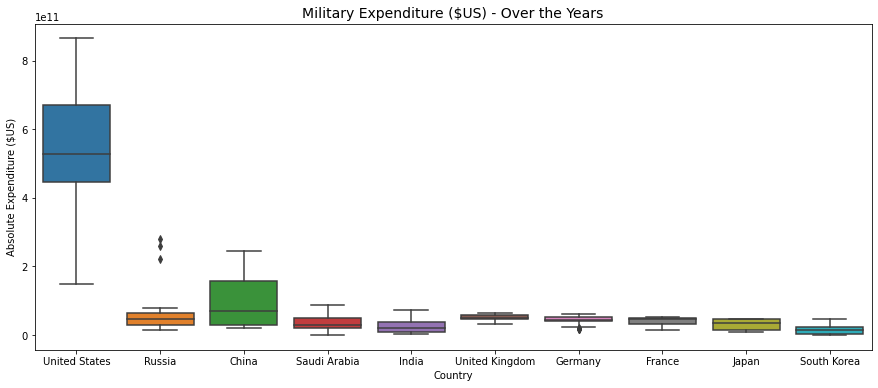

In [ ]:
# Lets make a list with the countries above
lst = [country for country in df_filtered3.Entity]

# Let's filter the data by the countries in the list
df_filtered4 = df_eda.loc[(df_eda['Entity'].isin(lst))].sort_values(by=['military_expenditure'], ascending=False)

# Delete null data from the column that we are analysing
df_filtered4.dropna(subset=['military_expenditure'], inplace = True)

# Create a function of the graph to reuse later
def boxplot(figsize, title, data, x, y, xlabel, ylabel):

  # Plot the graph
  plt.figure(figsize=figsize)

  # Title
  plt.title(title, fontsize = 14)

  # Graph
  sns.boxplot(x = x, y = y, data = data)

  # Label
  plt.xlabel(xlabel)
  plt.ylabel(ylabel)
  plt.show()

boxplot((15, 6), 'Military Expenditure ($US) - Over the Years', df_filtered4, 
        'Entity', 'military_expenditure', 
        'Country', 'Absolute Expenditure ($US)')

We see that the United States has always invested much more than other countries.

One thing that made me curious about this graph are these extreme points in the boxplot relative to Russia, shall we investigate?

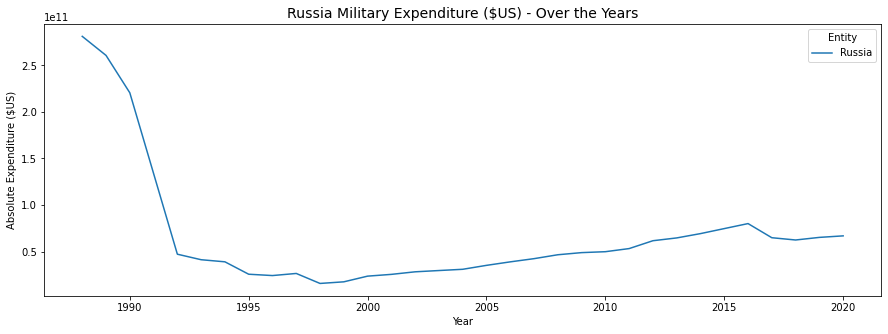

In [ ]:
# Investigation of extreme points relative to Russia
df_filtered5 = df_eda.loc[(df_eda['Entity'] == 'Russia')]

# Delete null data from the column that we are analysing
df_filtered5.dropna(subset=['military_expenditure'], inplace = True)

# Create a function of the graph to reuse later
def linegraph(figsize, title, data, x, y, xlabel, ylabel, hue):

  # Plot the graph
  plt.figure(figsize=figsize)

  # Title
  plt.title(title, fontsize = 14)

  # Graph
  sns.lineplot(data = data, x = x, y = y, hue=hue)

  # Label
  plt.xlabel(xlabel)
  plt.ylabel(ylabel)
  plt.show()

linegraph((15, 5), 'Russia Military Expenditure ($US) - Over the Years', df_filtered5, 
        'Year', 'military_expenditure', 
        'Year', 'Absolute Expenditure ($US)', 'Entity')

Unfortunately we don't have data from Russia before 1988. Could it be because of the extremely closed government at the time of the [Soviet Union](https://en.wikipedia.org/wiki/Soviet_Union)?

The data began to emerge from 1988, and perhaps it may be an indication of the flexibilization of the government at the time when the president was [Mikhail Gorbachev](https://pt.wikipedia.org/wiki/Mikhail_Gorbatchov). It was precisely at this time of the current president Mikhail Gorbachev, when the USSR began to decline because of his attempts to reform the system. The USSR came to an end in 1991. Makes sense?

Anyway, these extreme values ​​that we saw in the boxplot plot of Russia, came from there, in the mid-1980s to 1990s, a time when the USSR was still standing and then we see a long decline after the USSR ceased to exist.

This leads us to believe that the USSR invested much more in military spending and that I also imagine that the country at this time of turmoil and transition went through strong financial crises. Hence this sudden drop.

### 4. Were there extreme values in military expenditures by countries in the years there were wars?

We know that there have been some wars in history and that it would be plausible if countries increased their military spending in these periods. Let's see if the data tells us that?

In [ ]:
# Let's check what was the first year we had data
print(df_eda.Year.min())

1949


Between that period from 1949 to 2020, we didn't have any world war, because the second war ended in 1945, but between 1947 and 1991 we had the cold war, which was a long conflict and maybe it's not the best to draw conclusions for what we are wanting in that specific topic.

Anyway, let's plot a graph between Russia and the United States to see if we can get any evidence.

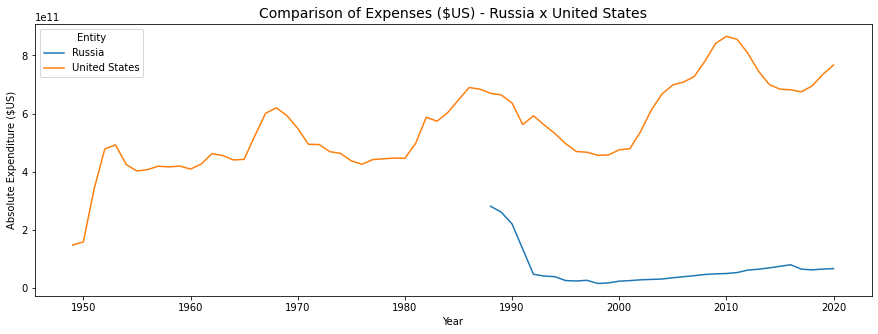

In [ ]:
# Investigation of extreme points relative to Russia
df_filtered6 = df_eda.loc[(df_eda['Entity'] == 'Russia') |
                          (df_eda['Entity'] == 'United States')]

# Delete null data from the column that we are analysing
df_filtered6.dropna(subset=['military_expenditure'], inplace = True)

# graph between Russia and the United States
linegraph((15, 5), 'Comparison of Expenses ($US) - Russia x United States', df_filtered6, 
        'Year', 'military_expenditure', 
        'Year', 'Absolute Expenditure ($US)', 'Entity')

As we think, it is difficult to affirm this pattern that we are trying to capture by this example of the cold war. What we can say is that the United States spends much more money than Russia according to the data we have.

A major conflict that we had in the 21st century was between the United States and extremist groups that were based in Afghanistan and Pakistan. This conflict lasted around 2001 to 2011, let's check it out graphically.

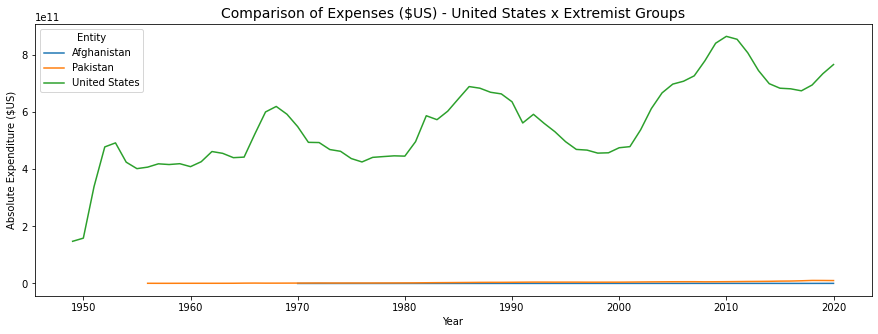

In [ ]:
# Investigation of extreme points relative to Russia
df_filtered7 = df_eda.loc[(df_eda['Entity'] == 'United States') |
                          (df_eda['Entity'] == 'Pakistan') |
                          (df_eda['Entity'] == 'Afghanistan')]

# Delete null data from the column that we are analysing
df_filtered7.dropna(subset=['military_expenditure'], inplace = True)

# graph between Russia and the United States
linegraph((15, 5), 'Comparison of Expenses ($US) - United States x Extremist Groups', df_filtered7, 
        'Year', 'military_expenditure', 
        'Year', 'Absolute Expenditure ($US)', 'Entity')

Once again, we were unable to draw significant conclusions. We even see a possible upward trend in US spending in this period, but we cannot say the same for the other two countries. Again, what we can see is the giant difference between the military power of the United States and the other two.

### 5. What is the correlation of military expenditures with GDP and population?

Finally, let's check the degree of correlation between the variables presented during this project, which were: military expenditure, population, GDP and the other two that we created (percentage military expenditure and military expenditure percapita).

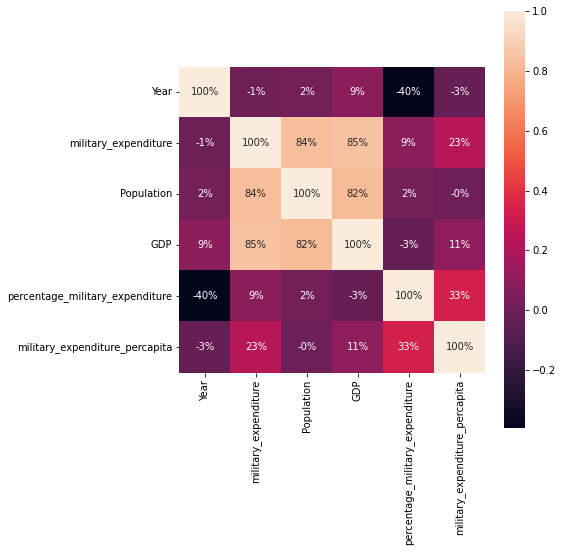

In [ ]:
# Correlation coefficient between the variables of this problem
corr = df_eda.corr()
plt.figure(figsize=(8,8))
sns.heatmap(corr, fmt='.0%', annot=True, square=True)
plt.tight_layout()

For contextualization, the correlation coefficient varies from -1 to 1 and two variables are positively correlated if a variation in one of them is associated with a variation in the other in the same direction. A correlation is negative if a positive change in one of the variables is associated with a negative change in the other. If it is 0, it means that the variables have no significant association with each other.

As we can see, population and GDP have very high correlations with a country's military spending. We also see that GDP and population have a high correlation with each other, but that was to be expected, right?

Let's see this in a scatterplot!

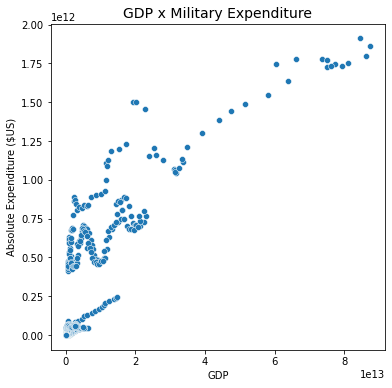

In [ ]:
# Create a function of the graph to reuse later
def scatter(figsize, title, data, x, y, xlabel, ylabel):

  # Plot the graph
  plt.figure(figsize=figsize)

  # Title
  plt.title(title, fontsize = 14)

  # Graph
  sns.scatterplot(data = data, x = x, y = y)

  # Label
  plt.xlabel(xlabel)
  plt.ylabel(ylabel)
  plt.show()

# graph between GDP and military expenditure
scatter((6, 6), 'GDP x Military Expenditure', df_eda, 
        'GDP', 'military_expenditure', 
        'GDP', 'Absolute Expenditure ($US)')

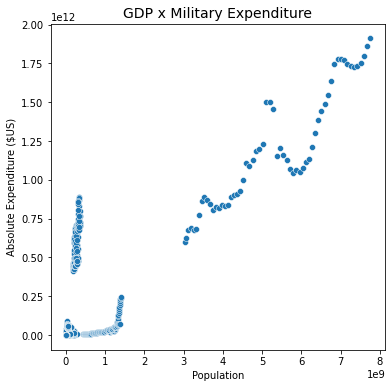

In [ ]:
# graph between Population and military expenditure
scatter((6, 6), 'GDP x Military Expenditure', df_eda, 
        'Population', 'military_expenditure', 
        'Population', 'Absolute Expenditure ($US)')

See that we have linear trends between the variables as the correlation coefficient showed us but we also see some noise.

Would we be able to predict countries military expenditures with just these variables or would we need others for a predictive model to work well?

I think we would have to try to be sure, who knows in a next project? I imagine it would be very interesting to try to predict these values!

# Conclusion

Through this analysis we were able to explore some situations in which military expenditure, population and GDP data come in to help us obtain insights for better decision making in a company or even a government.

Also, in this project, we go through essential steps in any work related to information and data, let's recap:

* We made a brief introduction
* We collect the data
* We did data engineering to join the datasets and work with a final table
* We did extensive exploratory analysis and answered interesting questions
* Conclusion

In the end, we left a question in the air, which is how well a predictive model can perform with this dataset. Would we have to collect more samples? Add more variables? Or maybe create new variables from the ones we already have, as we did in this project.

Anyway, that would be for a future work or you, reader, feel free to continue it, do more exploratory analysis and answer other questions and even do the predictive analysis we talked about.

#### Thank you for your time!
Let me know if you have any questions or feedbacks, I’d love to hear from you!